<a href="https://colab.research.google.com/github/tom-shering/Masters-Module-2/blob/main/Task_3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Authors: Abhimanyu and Tom

# QUESTIONS 
# 1. num_process = 0. Is that standard practice? 
# 2. Dropout is originally introduced but not used in model 2?
# 3. Why isn't the last model saved as a model? How is it trained? 

# ACTIONS 
# 1. Create a train_model() function.

import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

import torch.nn as nn
import torch.nn.functional as F


# 1. Initial Preparation

In [16]:
# Check if GPU is available:
gpu_trainer = torch.cuda.is_available()

if not gpu_trainer:
    print('No GPU Support. Training on CPU')
else:
    print('GPU is available! Training on GPU')

No GPU Support. Training on CPU


In [17]:
# Number of subprocesses to use for data loading:
num_process = 0
# Batch size:
batch_size = 20
# Validation proportional size: 
valid_size = 0.2

# Transform to convert data to a normalized torch.FloatTensor:
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(), #Default probability = 0.5
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 
    # transforms.Normalize maps to mean = 0, with -1 >= x >= 1
    ])

# Training and test datasets: 
training_data = datasets.CIFAR10('data', train=True,
                              download=True, transform=transformer)
testing_data = datasets.CIFAR10('data', train=False,
                             download=True, transform=transformer)

# Obtain training indices that will be used for validation:
num_train = len(training_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# Define samplers for training and validation batches:
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# Prepare data loaders:
train_loader = torch.utils.data.DataLoader(training_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_process)
valid_loader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_process)
test_loader = torch.utils.data.DataLoader(testing_data, batch_size=batch_size, 
    num_workers=num_process)

# Specify the image classes:
classes = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
           "Dog", "Frog", "Horse", "Ship", "Truck"]

Files already downloaded and verified
Files already downloaded and verified


#2. Visualising Images 


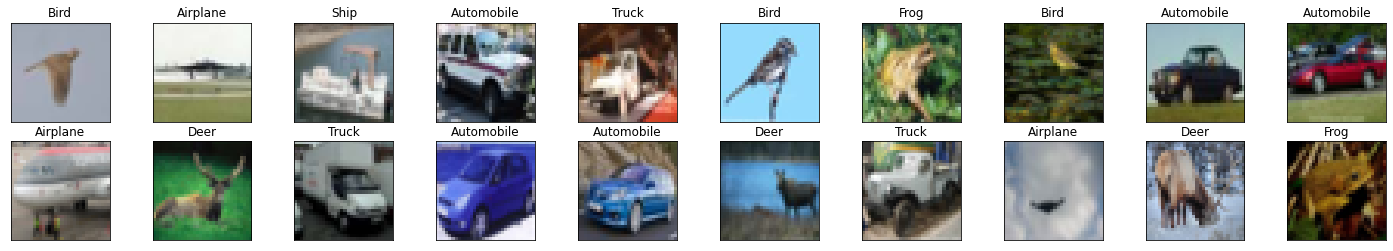

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# Display sample images:
def imshow(img):
    img = (img * 0.5) + 0.5  # de-normalizing
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
# training images
iter_data = iter(train_loader)
images, labels = iter_data.__next__()
images = images.numpy() # convert images to numpy for display
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
  imshow(images[idx])
  ax.set_title(classes[labels[idx]])

# 3. Base CNN Design

In [22]:
# REFERENCE: Initial layer design adapted from PyTorch Website 
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 5)
    self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5)
    self.pool = nn.MaxPool2d(kernel_size = 2) # default stride = kernel_size
    self.fc1 = nn.Linear(in_features = 16*5*5, out_features=120)
    self.fc2 = nn.Linear(in_features = 120, out_features=64)
    self.fc3 = nn.Linear(in_features = 64, out_features=10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

# Create a complete CNN
model = CNN()
print(model)

# Move tensors to GPU if CUDA is available
if gpu_trainer: model.cuda()

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


#4. Optimizer and Loss Function

In [20]:
import torch.optim as optim

# Optimizer function:
# specify optimizer - ADAM with default hyperparameters and a learning rate of 0.01
optimizer = optim.Adam(model.parameters(), lr=.01)
# Loss function:
criterion = nn.CrossEntropyLoss() #CrossEntropy loss for multiclass classification


#5. Training the Model 

Epoch: 1 	Training Loss: 1.843467 	Validation Loss: 0.460964
Validation loss decreased (inf --> 0.460964).  Saving model ...
Epoch: 2 	Training Loss: 1.843468 	Validation Loss: 0.460951
Validation loss decreased (0.460964 --> 0.460951).  Saving model ...
Epoch: 3 	Training Loss: 1.843454 	Validation Loss: 0.460961
Epoch: 4 	Training Loss: 1.843475 	Validation Loss: 0.460960
Epoch: 5 	Training Loss: 1.843445 	Validation Loss: 0.460950
Validation loss decreased (0.460951 --> 0.460950).  Saving model ...
Epoch: 6 	Training Loss: 1.843458 	Validation Loss: 0.460950
Epoch: 7 	Training Loss: 1.843476 	Validation Loss: 0.460949
Validation loss decreased (0.460950 --> 0.460949).  Saving model ...
Epoch: 8 	Training Loss: 1.843443 	Validation Loss: 0.460961
Epoch: 9 	Training Loss: 1.843461 	Validation Loss: 0.460951
Epoch: 10 	Training Loss: 1.843439 	Validation Loss: 0.460960
Epoch: 11 	Training Loss: 1.843448 	Validation Loss: 0.460949
Validation loss decreased (0.460949 --> 0.460949).  Savi

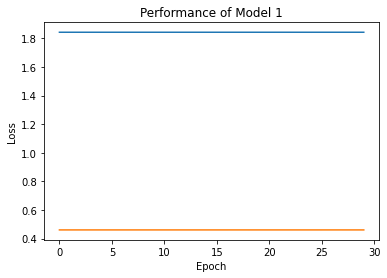

In [23]:
 # Number of epochs to train the model:
n_epochs = 30
# Initializing empty list for recording loss / epoch:
train_losslist = []
valid_losslist = []
valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    

    # training the model 
    
    model.train()
    for data, target in train_loader:
        # for GPU
        if gpu_trainer:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass
        loss.backward()
        #parameter update
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
  
    # Validate the model:

    model.eval()
    for data, target in valid_loader:
        # if gpu is available
        if gpu_trainer:
            data, target = data.cuda(), target.cuda()
        # forward pass:  predict outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # Calculate average losses:
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    train_losslist.append(train_loss)
    valid_losslist.append(valid_loss)
        
    # Print training/validation statistics:
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # Save model if validation loss has decreased:
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

i = [*range(n_epochs)]
plt.plot(i, train_losslist)
plt.plot(i, valid_losslist)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Performance of Model 1")
plt.show()

## Loading model 

In [ ]:
model.load_state_dict(torch.load('model_cifar.pt'))
# we could save the best one as well to compare later 

#6. Testing the Model

In [24]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if gpu_trainer:
        data, target = data.cuda(), target.cuda()
    # forward pass: predict outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not gpu_trainer else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
  
    for i in range(batch_size):
      
      label = target.data[i]
      class_correct[label] += correct[i].item()
      class_total[label] += 1
      

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 2.304434

Test Accuracy of Airplane:  0% ( 0/1000)
Test Accuracy of Automobile:  0% ( 0/1000)
Test Accuracy of  Bird:  0% ( 0/1000)
Test Accuracy of   Cat: 89% (896/1000)
Test Accuracy of  Deer:  0% ( 0/1000)
Test Accuracy of   Dog:  0% ( 0/1000)
Test Accuracy of  Frog:  0% ( 0/1000)
Test Accuracy of Horse:  8% (86/1000)
Test Accuracy of  Ship:  0% ( 0/1000)
Test Accuracy of Truck:  0% ( 0/1000)

Test Accuracy (Overall):  9% (982/10000)


# 7. Improving the Model  
## Adding padding

In [25]:
class CNN2(nn.Module):
  def __init__(self):
    super(CNN2, self).__init__()
    self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 5, padding = 1)
    self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, padding =1)
    self.pool = nn.MaxPool2d(kernel_size = 2) # default stride = kernel_size
    self.fc1 = nn.Linear(in_features = 16*5*5, out_features=120)
    self.fc2 = nn.Linear(in_features = 120, out_features=64)
    self.fc3 = nn.Linear(in_features = 64, out_features=10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

# Create a complete CNN:
model_2 = CNN2()
print(model)

# Move tensors to GPU if CUDA is available:
if gpu_trainer:
  model.cuda()

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Epoch: 1 	Training Loss: 1.843469 	Validation Loss: 0.460960
Validation loss decreased (inf --> 0.460960).  Saving model ...
Epoch: 2 	Training Loss: 1.843450 	Validation Loss: 0.460965
Epoch: 3 	Training Loss: 1.843458 	Validation Loss: 0.460958
Validation loss decreased (0.460960 --> 0.460958).  Saving model ...
Epoch: 4 	Training Loss: 1.843464 	Validation Loss: 0.460958
Epoch: 5 	Training Loss: 1.843453 	Validation Loss: 0.460958
Validation loss decreased (0.460958 --> 0.460958).  Saving model ...
Epoch: 6 	Training Loss: 1.843472 	Validation Loss: 0.460961
Epoch: 7 	Training Loss: 1.843441 	Validation Loss: 0.460960
Epoch: 8 	Training Loss: 1.843441 	Validation Loss: 0.460946
Validation loss decreased (0.460958 --> 0.460946).  Saving model ...
Epoch: 9 	Training Loss: 1.843443 	Validation Loss: 0.460947
Epoch: 10 	Training Loss: 1.843449 	Validation Loss: 0.460939
Validation loss decreased (0.460946 --> 0.460939).  Saving model ...
Epoch: 11 	Training Loss: 1.843449 	Validation Lo

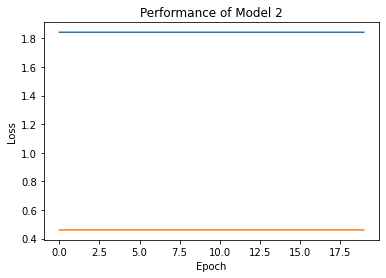

In [26]:
# Number of epochs to train the model:
n_epochs = 20
# Initializing empty list for recording loss / epoch:
train_losslist = []
valid_losslist = []
valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    

    # training the model 
    
    model_2.train()
    for data, target in train_loader:
        # for GPU
        if gpu_trainer:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass
        loss.backward()
        #parameter update
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
  
    # Validate the model:

    model_2.eval()
    for data, target in valid_loader:
        # if gpu is available
        if gpu_trainer:
            data, target = data.cuda(), target.cuda()
        # forward pass:  predict outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # Calculate average losses:
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    train_losslist.append(train_loss)
    valid_losslist.append(valid_loss)
        
    # Print training/validation statistics:
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # Save model if validation loss has decreased:
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model_2.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

i = [*range(n_epochs)]
plt.plot(i, train_losslist)
plt.plot(i, valid_losslist)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Performance of Model 2")
plt.show()

#8. Improving the Model 
## Adding an extra conv layer and more channels

In [33]:
class CNN3(nn.Module):
  def __init__(self):
    super(CNN3, self).__init__()
    self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = 5, padding = 1)
    self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 5, padding =1)
    self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5, padding =1)
    self.pool = nn.MaxPool2d(kernel_size = 2) # default stride = kernel_siz
    self.fc1 = nn.Linear(in_features = 64*4*4, out_features=256)
    self.fc2 = nn.Linear(in_features = 256, out_features=64)
    self.fc3 = nn.Linear(in_features = 64, out_features=10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = x.view(-1, 64 * 4 * 4)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

# Create a complete CNN:
model_3 = CNN3()
print(model)

# Move tensors to GPU if CUDA is available:
if gpu_trainer:
  model.cuda()

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Epoch: 1 	Training Loss: 1.843461 	Validation Loss: 0.460955
Validation loss decreased (inf --> 0.460955).  Saving model ...
Epoch: 2 	Training Loss: 1.843465 	Validation Loss: 0.460937
Validation loss decreased (0.460955 --> 0.460937).  Saving model ...
Epoch: 3 	Training Loss: 1.843462 	Validation Loss: 0.460957
Epoch: 4 	Training Loss: 1.843462 	Validation Loss: 0.460965
Epoch: 5 	Training Loss: 1.843440 	Validation Loss: 0.460965
Epoch: 6 	Training Loss: 1.843453 	Validation Loss: 0.460955
Epoch: 7 	Training Loss: 1.843468 	Validation Loss: 0.460962
Epoch: 8 	Training Loss: 1.843439 	Validation Loss: 0.460952
Epoch: 9 	Training Loss: 1.843472 	Validation Loss: 0.460954
Epoch: 10 	Training Loss: 1.843436 	Validation Loss: 0.460960
Epoch: 11 	Training Loss: 1.843448 	Validation Loss: 0.460955
Epoch: 12 	Training Loss: 1.843492 	Validation Loss: 0.460958
Epoch: 13 	Training Loss: 1.843463 	Validation Loss: 0.460950
Epoch: 14 	Training Loss: 1.843452 	Validation Loss: 0.460947
Epoch: 1

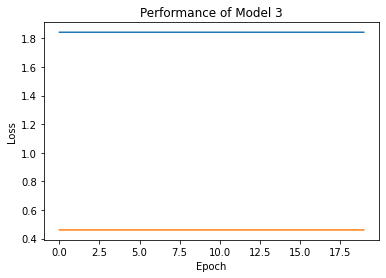

In [35]:
# Number of epochs to train the model:
n_epochs = 20
# Initializing empty list for recording loss / epoch:
train_losslist = []
valid_losslist = []
valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    

    # training the model 
    
    model_3.train()
    for data, target in train_loader:
        # for GPU
        if gpu_trainer:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass
        loss.backward()
        #parameter update
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
  
    # Validate the model:

    model_3.eval()
    for data, target in valid_loader:
        # if gpu is available
        if gpu_trainer:
            data, target = data.cuda(), target.cuda()
        # forward pass:  predict outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # Calculate average losses:
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    train_losslist.append(train_loss)
    valid_losslist.append(valid_loss)
        
    # Print training/validation statistics:
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # Save model if validation loss has decreased:
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model_2.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

i = [*range(n_epochs)]
plt.plot(i, train_losslist)
plt.plot(i, valid_losslist)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Performance of Model 3")
plt.show()

#9. Improving the model
## Layer blocks, dropout

In [37]:
class CNN4(nn.Module):
  def __init__(self):
        
        super(torch.nested, self).__init__()

        self.conv_layer = nn.Sequential(
# Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )


  def forward(self, x):
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x



In [38]:
# number of epochs to train the model
n_epochs = 30
# initializing empty list for recording loss / epoch
train_losslist = []
valid_losslist = []
valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    

    # training the model 
    
    model.train()
    for data, target in train_loader:
        # for GPU
        if gpu_trainer:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass
        loss.backward()
        #parameter update
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
  
    # validate the model

    model.eval()
    for data, target in valid_loader:
        # if gpu is available
        if gpu_trainer:
            data, target = data.cuda(), target.cuda()
        # forward pass:  predict outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    train_losslist.append(train_loss)
    valid_losslist.append(valid_loss)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

i = [*range(30)]
plt.plot(i, train_losslist)
plt.plot(i, valid_losslist)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Performance of Model 4")
plt.show()

Epoch: 1 	Training Loss: 1.843459 	Validation Loss: 0.460949
Validation loss decreased (inf --> 0.460949).  Saving model ...
Epoch: 2 	Training Loss: 1.843461 	Validation Loss: 0.460961
Epoch: 3 	Training Loss: 1.843459 	Validation Loss: 0.460961
Epoch: 4 	Training Loss: 1.843473 	Validation Loss: 0.460955
Epoch: 5 	Training Loss: 1.843464 	Validation Loss: 0.460954
Epoch: 6 	Training Loss: 1.843463 	Validation Loss: 0.460964
Epoch: 7 	Training Loss: 1.843462 	Validation Loss: 0.460957
Epoch: 8 	Training Loss: 1.843452 	Validation Loss: 0.460960
Epoch: 9 	Training Loss: 1.843454 	Validation Loss: 0.460948
Validation loss decreased (0.460949 --> 0.460948).  Saving model ...
Epoch: 10 	Training Loss: 1.843466 	Validation Loss: 0.460963
Epoch: 11 	Training Loss: 1.843444 	Validation Loss: 0.460951
Epoch: 12 	Training Loss: 1.843474 	Validation Loss: 0.460953
Epoch: 13 	Training Loss: 1.843468 	Validation Loss: 0.460958
Epoch: 14 	Training Loss: 1.843464 	Validation Loss: 0.460954
Epoch: 1

KeyboardInterrupt: ignored